# Simple Random Walk (SRW)

The simple random walk is a random variable $S_n$ on the integers $S_t \in \mathbb{Z}$, which evolvess on discrete time $t$.

Let $(\xi_i)_{i \in \mathbb{N}}$ i.i.d. random variables with distribution uniformly in $\{-1,+1\}$.
Then we define the random walk $S_t := \displaystyle\sum_{i=1}^t \xi_i$.



In [8]:
import numpy as np
import tqdm
import time

k = 10

x = np.random.choice([-1,1],k)
rw = sum(x)

print(rw)




2


In [11]:
# This function generate n=numbsimul of SRW with k steps

def generate_srw(k,numbsimul):
    rw = np.zeros(numbsimul)
    for n in range(numbsimul):
        x = np.random.choice([-1,1],k)
        rw[n] = sum(x)
    return rw


# Example of usage
k=10
numbsimul = 5

data = generate_srw(k,numbsimul)
print(data)


[-2. -6.  0.  2.  0.]


In [12]:
def full_data_srw(k1,k2,numbsimul):
    # k_1 is the minum size simulation and k2 is biggest 
    if k2<=k1:
        print('------------k2 must be bigger than k1-----------')
        return('error')
    
    start_time = time.time()
    
    data = np.zeros((k2+1-k1, numbsimul))

    for i, k in enumerate(range(k1, k2+1)):
        n = pow(2,k)
        data[i,:] = np.array(generate_srw(n+1,numbsimul)) # I am simuating random walks with an odd number of steps to avoid rw=0 that gives problems when take log
    
    print('\n')
    print("--- %s seconds ---" % (time.time() - start_time))
    print('\n')
    return data
    

# Example of usage
k1 = 5 # remember that it will simulate n = 2^k1+1
k2 = 10
numbsimul = 8

data = full_data_srw(k1,k2,numbsimul)
data






--- 0.002122640609741211 seconds ---




array([[  1.,  -7.,  -9.,   1.,  -1.,   3.,   3.,  -7.],
       [ -1.,   9.,   5.,  15.,   3.,  -5.,   5.,   9.],
       [-15.,  -1., -13., -11.,   9., -13.,   1.,   5.],
       [  7.,   1., -19.,  17.,  -1.,  23.,   7.,  19.],
       [ -1.,  31.,   3.,  27.,  23.,   5.,  33.,  -1.],
       [ 37.,  15., -11.,  23.,  13.,  49., -53.,  19.]])



--- 28.336671113967896 seconds ---




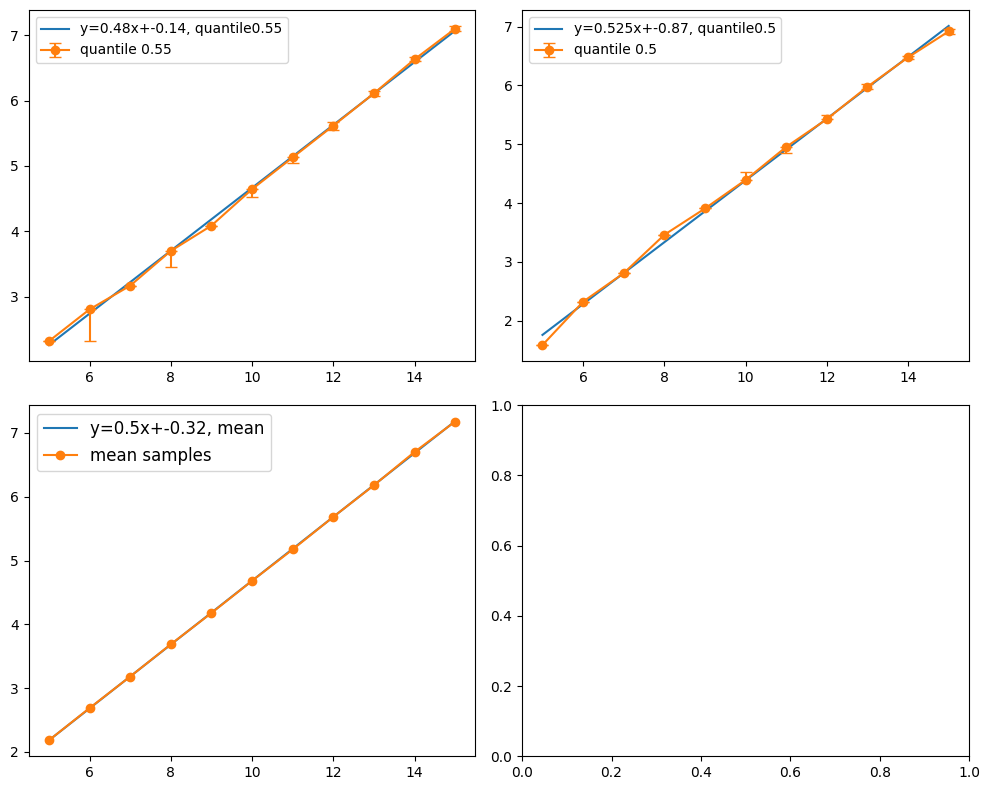

 ---- diffusion constant is approximally 0.48049714114640263 using quantile 0.55 ----
 ---- diffusion constant is approximally 0.525231563802893 median ----
 ---- diffusion constant is approximally 0.5001362650864358 mean ----


In [14]:
from loglogplot import log_log_plot

k1= 5

k2= 15

numbsimul = 10000

A = full_data_srw(k1,k2,numbsimul)

# Making the graphic of log_log_plot

q = 0.55
dom = np.arange(k1,k2+1)

log_log_plot(q,dom,A)